In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv


In [2]:
df = pd.read_csv("/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv")

In [3]:
df.head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932


In [4]:
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [5]:
df['Exp Type'].replace(to_replace = "Food",value = 0,inplace = True)
df['Exp Type'].replace(to_replace = "Fuel",value = 1,inplace = True)
df['Exp Type'].replace(to_replace = "Bills",value = 2,inplace = True)
df['Exp Type'].replace(to_replace = "Entertainment",value = 3,inplace = True)
df['Exp Type'].replace(to_replace = "Grocery",value = 4,inplace = True)
df['Exp Type'].replace(to_replace = "Travel",value = 5,inplace = True)

In [6]:
df['Exp Type'].value_counts()

0    5463
1    5257
2    5078
3    4762
4    4754
5     738
Name: Exp Type, dtype: int64

In [7]:
df['Gender'].replace(to_replace = "F",value = 0,inplace = True)
df['Gender'].replace(to_replace = "M",value = 1,inplace = True)

In [8]:
df['Gender'].value_counts()

0    13680
1    12372
Name: Gender, dtype: int64

In [9]:
df['Card Type'].replace(to_replace = "Silver",value = 0,inplace = True)
df['Card Type'].replace(to_replace = "Signature",value = 1,inplace = True)
df['Card Type'].replace(to_replace = "Platinum",value = 2,inplace = True)
df['Card Type'].replace(to_replace = "Gold",value = 3,inplace = True)

In [10]:
df['Card Type'].value_counts()

0    6840
1    6447
2    6398
3    6367
Name: Card Type, dtype: int64

In [11]:
df.drop(['index','Date'], axis=1,inplace = True)

In [12]:
df['City'].value_counts()

Bengaluru, India          3552
Greater Mumbai, India     3493
Ahmedabad, India          3491
Delhi, India              3482
Hyderabad, India           784
                          ... 
Rayagada, India              1
Varanasi, India              1
Hugli-Chinsurah, India       1
Alirajpur, India             1
Fazilka, India               1
Name: City, Length: 986, dtype: int64

In [13]:
df

,City,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",3,2,0,82475
1,"Greater Mumbai, India",2,2,0,32555
2,"Bengaluru, India",0,2,0,101738
3,"Greater Mumbai, India",1,2,0,123424
4,"Bengaluru, India",3,2,0,171574
...,...,...,...,...,...
26047,"Kolkata, India",0,5,0,128191
26048,"Pune, India",1,5,1,246316
26049,"Hyderabad, India",0,5,1,265019
26050,"Kanpur, India",0,5,1,88174


Text(0.5, 1.0, 'Amount')

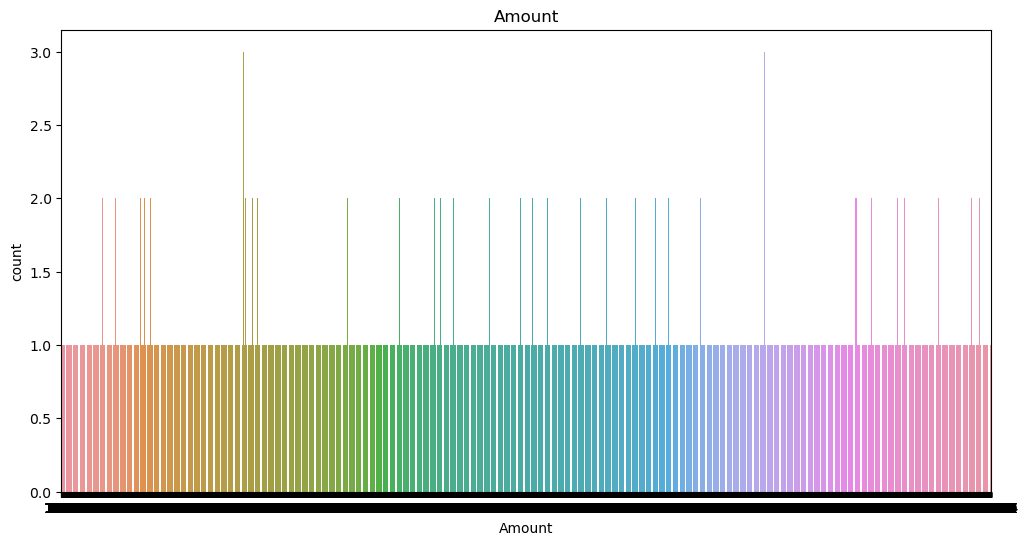

In [14]:
plt.figure(figsize = (12,6))
sns.countplot(data = df ,x='Amount').set_title('Amount')

Text(0.5, 1.0, 'Spending by Gender')

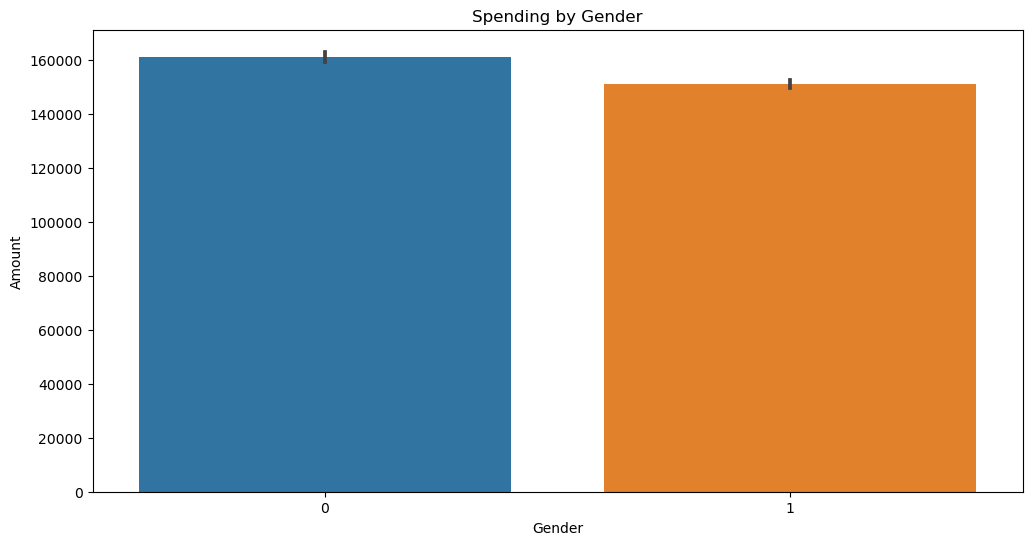

In [15]:
plt.figure(figsize = (12,6))
sns.barplot(data = df ,x='Gender',y = 'Amount').set_title('Spending by Gender')

Text(0.5, 1.0, 'Card Type')

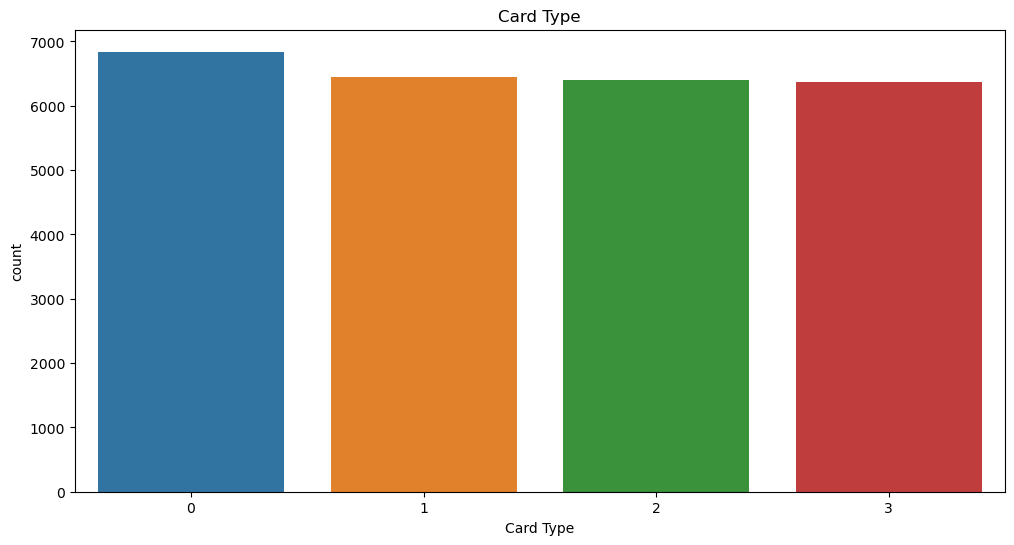

In [16]:
plt.figure(figsize = (12,6))
sns.countplot(data = df ,x='Card Type').set_title('Card Type')

In [17]:
px.pie(df.sort_values(by='Amount',ascending=1),values='Amount',names='Exp Type',title='Exp Types').show()

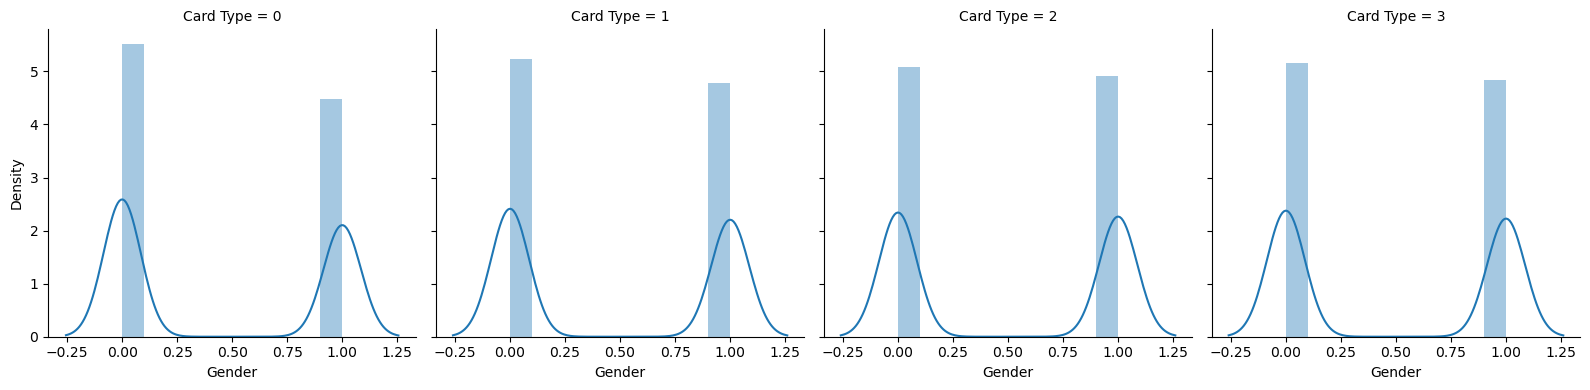

In [18]:
sea = sns.FacetGrid(df, col = "Card Type", height = 4)
sea.map(sns.distplot,"Gender")